In [1]:
# import all the necessary libraries

import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [6]:
# load the data
from ISLP import load_data
df_brain = load_data('BrainCancer')
df_brain.head()

,sex,diagnosis,loc,ki,gtv,stereo,status,time
0,Female,Meningioma,Infratentorial,90,6.11,SRS,0,57.64
1,Male,HG glioma,Supratentorial,90,19.35,SRT,1,8.98
2,Female,Meningioma,Infratentorial,70,7.95,SRS,0,26.46
3,Female,LG glioma,Supratentorial,80,7.61,SRT,1,47.80
4,Male,HG glioma,Supratentorial,90,5.06,SRT,1,6.30


In [7]:
# check for missing values
df_brain.isnull().sum()

sex          0
diagnosis    1
loc          0
ki           0
gtv          0
stereo       0
status       0
time         0
dtype: int64

In [8]:
# drop the missing values, because they are very few
df = df_brain.dropna()
df.reset_index(drop=True)
print ("Shape of dataset: ", df.shape)
df.head()

Shape of dataset:  (87, 8)


,sex,diagnosis,loc,ki,gtv,stereo,status,time
0,Female,Meningioma,Infratentorial,90,6.11,SRS,0,57.64
1,Male,HG glioma,Supratentorial,90,19.35,SRT,1,8.98
2,Female,Meningioma,Infratentorial,70,7.95,SRS,0,26.46
3,Female,LG glioma,Supratentorial,80,7.61,SRT,1,47.80
4,Male,HG glioma,Supratentorial,90,5.06,SRT,1,6.30


In [9]:
# check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 87
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   sex        87 non-null     category
 1   diagnosis  87 non-null     category
 2   loc        87 non-null     category
 3   ki         87 non-null     int64   
 4   gtv        87 non-null     float64 
 5   stereo     87 non-null     category
 6   status     87 non-null     int64   
 7   time       87 non-null     float64 
dtypes: category(4), float64(2), int64(2)
memory usage: 4.3 KB


In [11]:
# analyze the data
df.sex.value_counts()

Female    45
Male      42
Name: sex, dtype: int64

In [13]:
df['loc'].value_counts()

Supratentorial    68
Infratentorial    19
Name: loc, dtype: int64

In [14]:
df['stereo'].value_counts()

SRT    64
SRS    23
Name: stereo, dtype: int64

In [15]:
# one hot encoding the categorical variables
df_encoded = pd.get_dummies(df.drop(['diagnosis'], axis=1))
df_encoded.head()

,ki,gtv,status,time,sex_Female,sex_Male,loc_Infratentorial,loc_Supratentorial,stereo_SRS,stereo_SRT
0,90,6.11,0,57.64,1,0,1,0,1,0
1,90,19.35,1,8.98,0,1,0,1,0,1
2,70,7.95,0,26.46,1,0,1,0,1,0
3,80,7.61,1,47.80,1,0,0,1,0,1
4,90,5.06,1,6.30,0,1,0,1,0,1


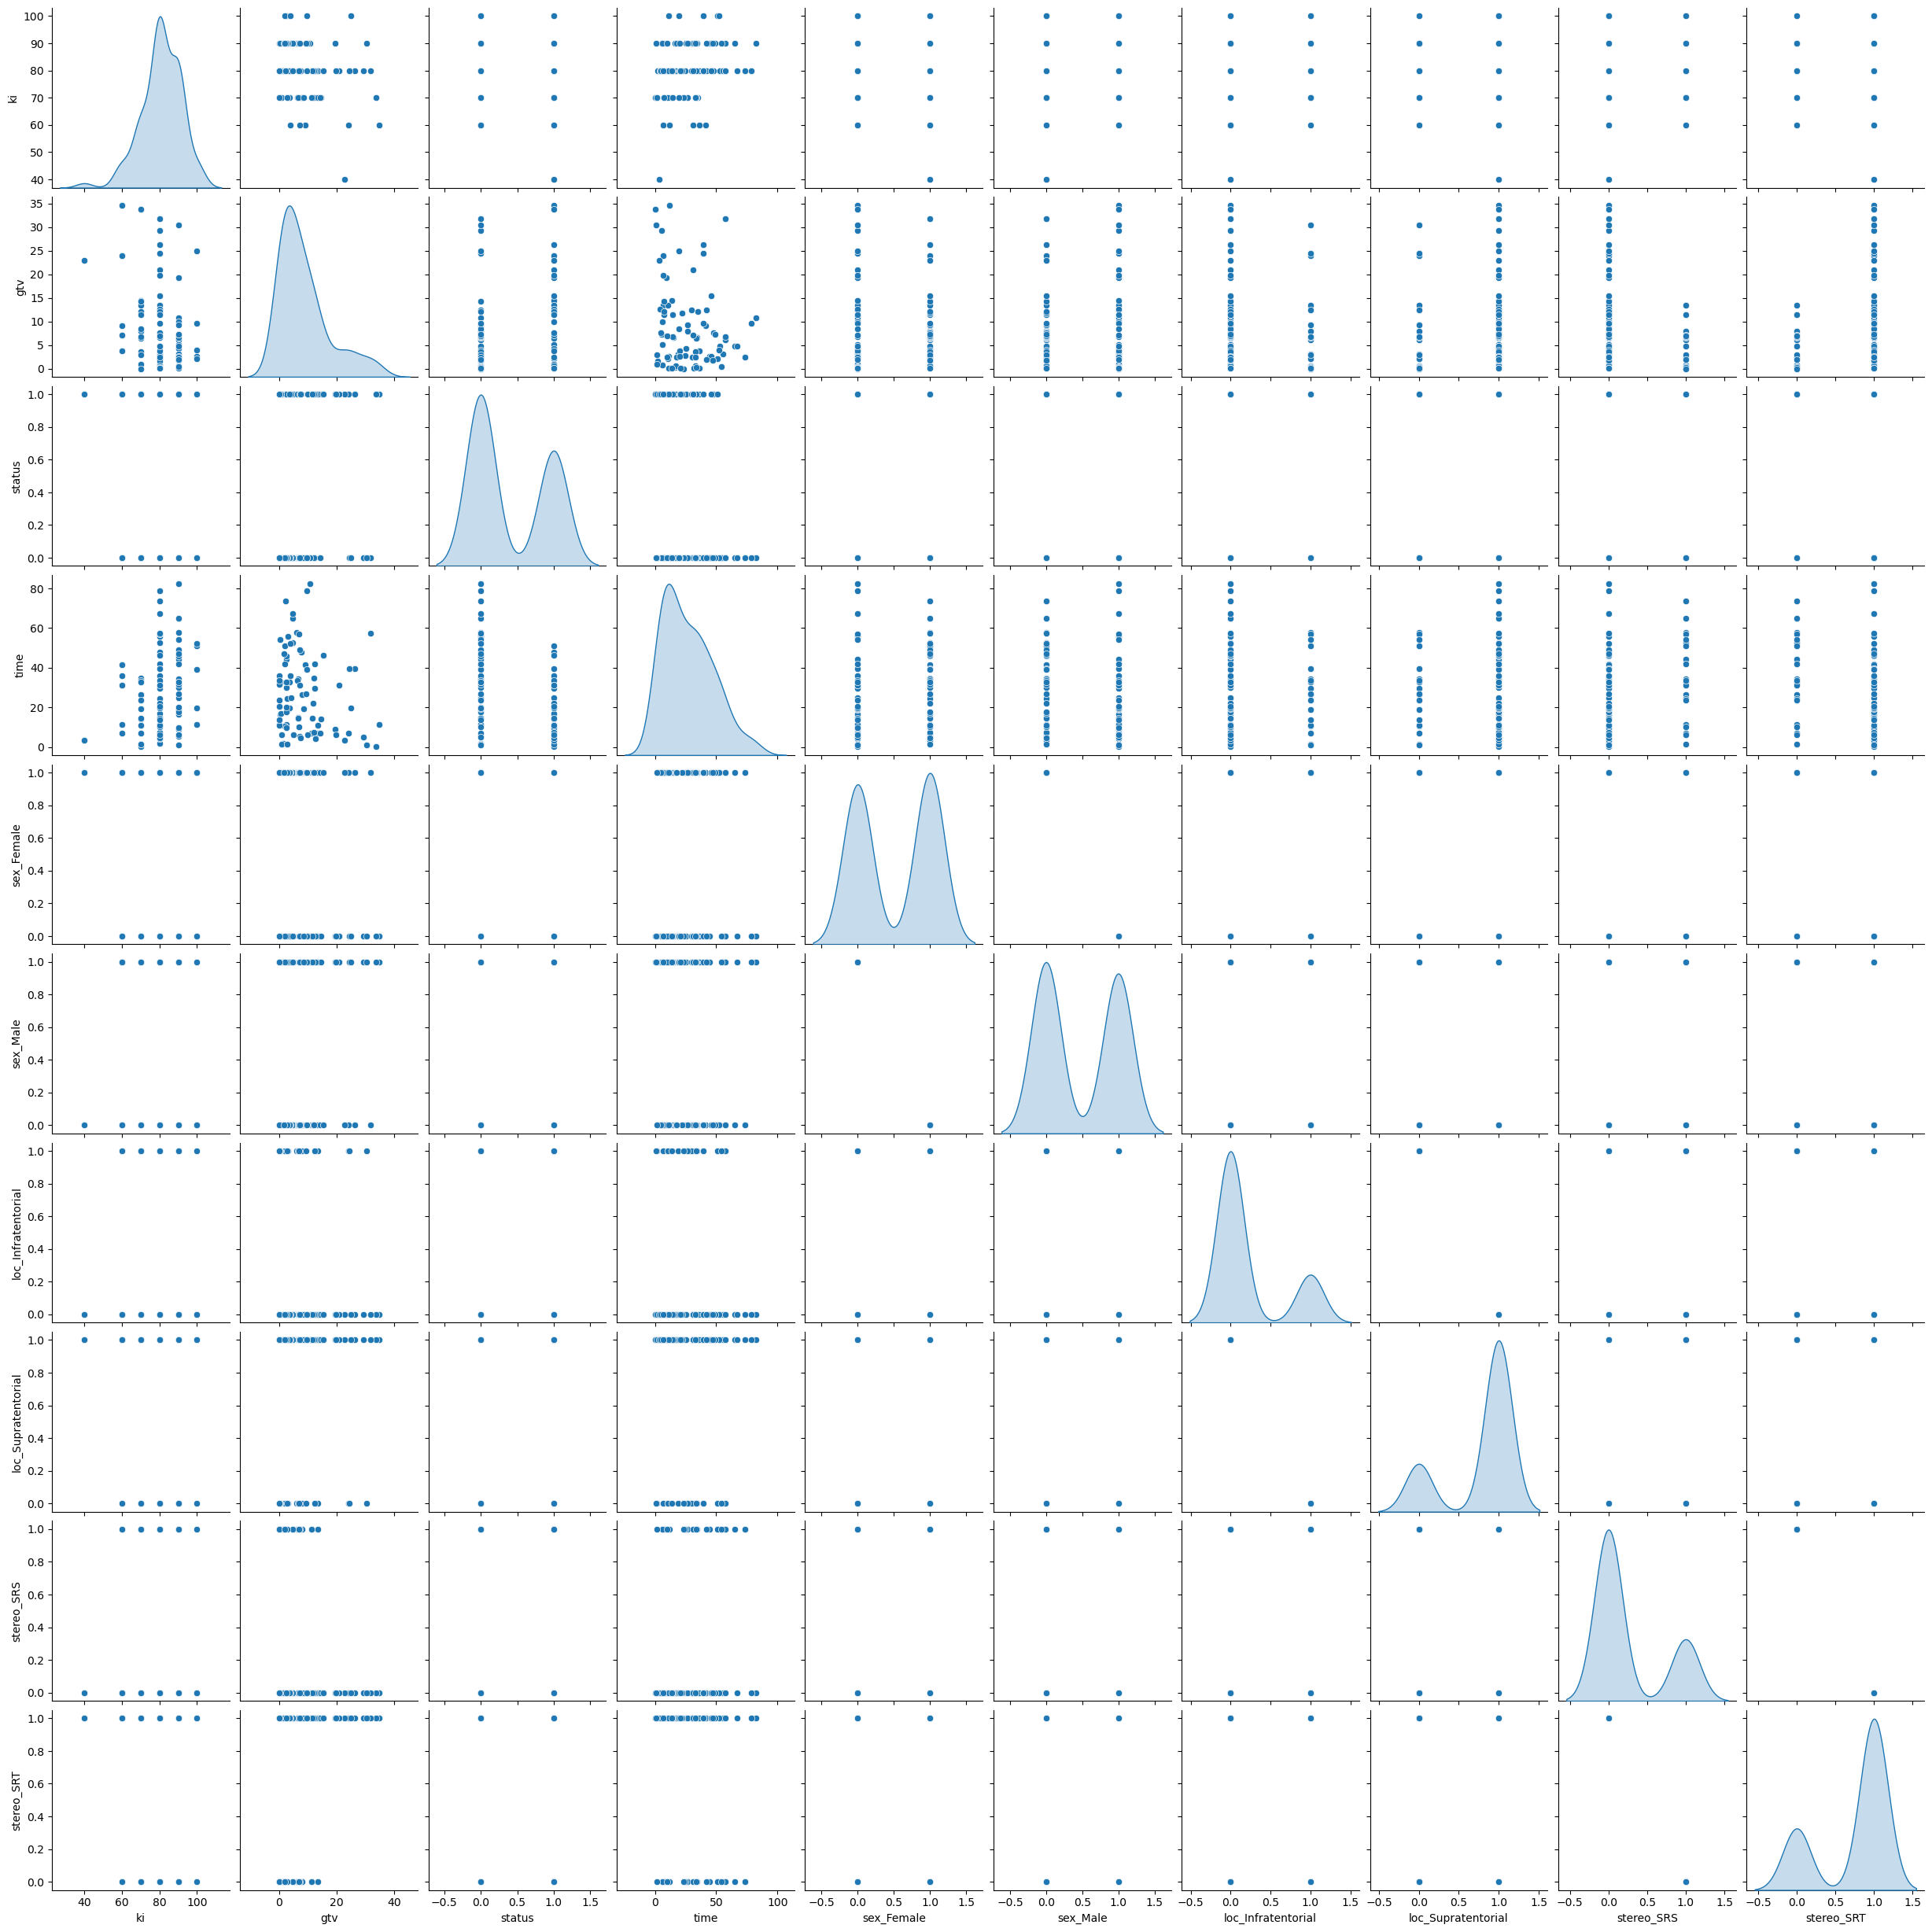

In [16]:
# pairplot to check for correlation and distribution
import seaborn as sns
sns.pairplot(df_encoded, diag_kind = "kde")


In [18]:
# define output variable and input variables
X = df_encoded.values
y = df['diagnosis']

In [19]:
# normalize the dataset
X_scaled = preprocessing.MinMaxScaler().fit(X).transform(X.astype(float))
X_scaled[0:5]

array([[0.83333333, 0.17614785, 0.        , 0.69790278, 1.        ,
        0.        , 1.        , 0.        , 1.        , 0.        ],
       [0.83333333, 0.55847531, 1.        , 0.10801309, 0.        ,
        1.        , 0.        , 1.        , 0.        , 1.        ],
       [0.5       , 0.22928097, 0.        , 0.31991757, 1.        ,
        0.        , 1.        , 0.        , 1.        , 0.        ],
       [0.66666667, 0.21946289, 1.        , 0.57861559, 1.        ,
        0.        , 0.        , 1.        , 0.        , 1.        ],
       [0.83333333, 0.14582732, 1.        , 0.07552431, 0.        ,
        1.        , 0.        , 1.        , 0.        , 1.        ]])

In [20]:
# split the dataset into train and test, with test size 20%
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.61111111, 0.66666667, 0.77777778, 0.77777778, 0.72222222,
       0.83333333, 0.88888889, 0.88888889, 0.72222222])

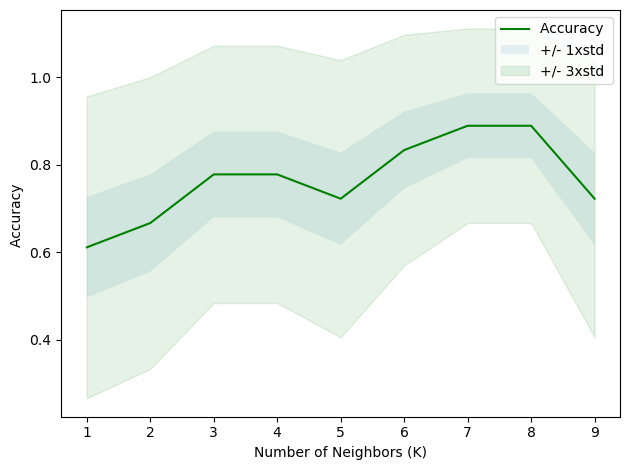

In [22]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [23]:
print("The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8888888888888888 with k= 7


In [24]:

k = 7
#Train Model and Predict
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

y_pred_knn = neigh.predict(X_test)

# Accuracy evaluation
f1 = f1_score(y_test, y_pred_knn, average='macro')

# get accuracy
acc = accuracy_score(y_test, y_pred_knn)

print("F1 Score: ", f1)
print("Accuracy: ", acc)

F1 Score:  0.46886446886446886
Accuracy:  0.8888888888888888


## naive bayes

In [25]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)


In [26]:
f1 = f1_score(y_test, y_pred_gnb, average='macro')

# get accuracy
acc = accuracy_score(y_test, y_pred_gnb)

print("F1 Score: ", f1)
print("Accuracy: ", acc)

F1 Score:  0.3589743589743589
Accuracy:  0.6111111111111112


## Polynomial Regression